# Global Societal Endangerment Index (GSEI)

Development notebook for step 2: Data Selection

In [32]:
import pandas as pd
import country_standardisation as my_cs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from outliers import find_outliers, find_outliers_per_indicator

## Selection of Data

Check the quality and availability of the indicators.

In [33]:
df = pd.read_csv('data/processing/preprocessed_all_data.csv')

df

,Country,Temp Change max 2012-2022,Disaster Affected Population 2020-2025,Disaster Damage US$T 2020-2025,"Unsafe water, sanitation (YLL)",Air pollution (YLL),Safe Drinking Water (%),Food Insecurity (%),Undernourishment (%),Renewable Freshwater per Capita (m3),...,Renewable Energy Consumption (%),Internet Users (%),Secure Internet Servers,Future Conflict Risk,Current Conflict Intensity,COVID-19 Expenditure per Capita (US$),Prevalence HIV/AIDS,Prevalence TB/Respiratory,Prevalence Malaria/Tropical,Prevalence Other Infectious
0,Aruba,1.303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.8,NaN,1397.181419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2.012,13016058.0,0.0,1422.29,4283.98,30.034098,80.9,30.4,1178.737859,...,20.0,NaN,43.758544,0.922130,335.0,2.0,13.08,20436.28,22050.99,1619.54
2,Angola,1.752,4544311.0,0.0,1710.48,2429.79,NaN,79.2,23.2,4285.826520,...,52.9,39.2935,40.217790,0.346535,0.0,NaN,1461.24,33231.90,38007.20,2256.36
3,Anguilla,1.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Albania,2.028,84.0,0.0,26.79,1660.57,70.736068,32.2,4.5,9567.281462,...,41.9,82.6137,1220.332909,0.007443,0.0,NaN,1.07,22568.22,903.34,1063.17
6,Andorra,3.243,NaN,NaN,2.19,239.38,90.640001,NaN,NaN,4027.359502,...,18.4,94.4855,14618.581181,NaN,NaN,NaN,53.38,12313.50,234.83,385.35
7,United Arab Emirates,1.699,346.0,0.0,9.79,618.65,NaN,10.0,2.7,15.665548,...,1.0,100.0000,2119.661179,0.009810,0.0,379.0,31.04,31692.01,4985.35,1077.42
8,Argentina,1.123,979425.0,938469000.0,30.34,660.86,NaN,36.1,3.2,6444.169076,...,9.2,88.3754,5451.201504,0.027757,0.0,NaN,338.77,21909.67,8783.15,732.95
9,Armenia,2.772,21265.0,0.0,26.70,2601.29,82.411724,7.8,2.5,2315.430578,...,9.1,77.0277,1166.538500,0.251417,20.0,56.0,47.10,24060.53,2892.90,1216.81


In [34]:
# check availability of countries for each indicator
def check_availability_per_indicator(df, max_availability, custom_country_list=None):
    if custom_country_list is not None:
        dfc = df[df['Country'].isin(custom_country_list)]
    else:
        dfc = df

    availability_indicators = pd.concat([dfc.drop(columns=['Country']).count(),
                                         dfc.drop(columns=['Country']).count().apply(lambda x: round(x/len(dfc)*100)),
                                         ], axis=1).reset_index()
    availability_indicators.columns = ['Indicator', 'Country_Count', 'Availability (%)']
    
    return availability_indicators.sort_values(by='Availability (%)', ascending=True).drop(availability_indicators[availability_indicators['Availability (%)'] > max_availability].index)

# check availability of indicators for each country
def check_availability_per_country(df, max_availability, custom_country_list=None):
    availability_countries = pd.concat([df['Country'],
                                        df.drop(columns=['Country']).count(axis=1),
                                        df.drop(columns=['Country']).count(axis=1).apply(lambda x: round(x/(len(df.columns)-1)*100)),
                                        ], axis=1)
    availability_countries.columns = ['Country', 'Indicator_Count', 'Availability (%)']
    
    if custom_country_list is not None:
        availability_countries = availability_countries[availability_countries['Country'].isin(custom_country_list)]
    
    return availability_countries.sort_values(by='Availability (%)', ascending=True).drop(availability_countries[availability_countries['Availability (%)'] >= max_availability].index)

In [35]:
# show indicators with less than 50% country availability
check_availability_per_indicator(df, 50)

,Indicator,Country_Count,Availability (%)
18,RoW Health Expenditure (%),41,16
37,COVID-19 Expenditure per Capita (US$),57,23
26,Gini Coefficient,71,29
21,Lower Secondary Completion Rate (%),73,29
27,Income Share Top 10%,71,29
16,Population below Poverty Line (%),71,29
19,Literacy Rate (%),79,32
24,Government Debt (% of GDP),83,33
25,Total Reserves (% of External Debt),96,39
22,Education Expenditure (US$M),115,46


In [36]:
# show countries with less than 50% indicator availability
check_availability_per_country(df, 50)

,Country,Indicator_Count,Availability (%)
27,Saint Barthélemy,0,0
197,Svalbard and Jan Mayen,0,0
195,South Georgia and the South Sandwich Islands,0,0
74,Falkland Islands (Malvinas),0,0
220,Tokelau,0,0
40,Cocos (Keeling) Islands,0,0
81,Guernsey,0,0
36,Bouvet Island,0,0
97,Heard Island and McDonald Islands,0,0
174,Pitcairn,0,0


### Restrict to UN Member States

In [37]:
un_members = pd.read_csv('data/UN_member_states.csv')
un_members.columns = ['Country']
# standardise country names
un_members['Country'] = my_cs.standardise_countries(un_members['Country'])

# filter df to UN member states
selected_countries = un_members['Country'].tolist()
df_selected = df[df['Country'].isin(selected_countries)]

df_selected.head(10)

Using fuzzy match for 'Bolivia (Plurinational State of)' -> 'Bolivia, Plurinational State of'
Using special case for 'Democratic Republic of the Congo' -> 'Congo, Democratic Republic of the'
Using fuzzy match for 'Iran (Islamic Republic of)' -> 'Iran, Islamic Republic of'
Using fuzzy match for 'Micronesia (Federated States of)' -> 'Micronesia, Federated States of'
Using fuzzy match for 'Republic of Korea' -> 'Korea, Republic of'
Using special case for 'Turkey' -> 'Türkiye'
Using fuzzy match for 'Venezuela (Bolivarian Republic of)' -> 'Venezuela, Bolivarian Republic of'


,Country,Temp Change max 2012-2022,Disaster Affected Population 2020-2025,Disaster Damage US$T 2020-2025,"Unsafe water, sanitation (YLL)",Air pollution (YLL),Safe Drinking Water (%),Food Insecurity (%),Undernourishment (%),Renewable Freshwater per Capita (m3),...,Renewable Energy Consumption (%),Internet Users (%),Secure Internet Servers,Future Conflict Risk,Current Conflict Intensity,COVID-19 Expenditure per Capita (US$),Prevalence HIV/AIDS,Prevalence TB/Respiratory,Prevalence Malaria/Tropical,Prevalence Other Infectious
1,Afghanistan,2.012,13016058.0,0.000000e+00,1422.29,4283.98,30.034098,80.9,30.4,1178.737859,...,20.0,NaN,43.758544,0.922130,335.0,2.0,13.08,20436.28,22050.99,1619.54
2,Angola,1.752,4544311.0,0.000000e+00,1710.48,2429.79,NaN,79.2,23.2,4285.826520,...,52.9,39.2935,40.217790,0.346535,0.0,NaN,1461.24,33231.90,38007.20,2256.36
5,Albania,2.028,84.0,0.000000e+00,26.79,1660.57,70.736068,32.2,4.5,9567.281462,...,41.9,82.6137,1220.332909,0.007443,0.0,NaN,1.07,22568.22,903.34,1063.17
6,Andorra,3.243,NaN,NaN,2.19,239.38,90.640001,NaN,NaN,4027.359502,...,18.4,94.4855,14618.581181,NaN,NaN,NaN,53.38,12313.50,234.83,385.35
7,United Arab Emirates,1.699,346.0,0.000000e+00,9.79,618.65,NaN,10.0,2.7,15.665548,...,1.0,100.0000,2119.661179,0.009810,0.0,379.0,31.04,31692.01,4985.35,1077.42
8,Argentina,1.123,979425.0,9.384690e+08,30.34,660.86,NaN,36.1,3.2,6444.169076,...,9.2,88.3754,5451.201504,0.027757,0.0,NaN,338.77,21909.67,8783.15,732.95
9,Armenia,2.772,21265.0,0.000000e+00,26.70,2601.29,82.411724,7.8,2.5,2315.430578,...,9.1,77.0277,1166.538500,0.251417,20.0,56.0,47.10,24060.53,2892.90,1216.81
13,Antigua and Barbuda,1.131,NaN,NaN,69.14,893.41,NaN,33.0,NaN,563.081354,...,0.9,91.4123,803.720691,0.000000,0.0,NaN,268.96,22017.50,13086.34,1346.62
14,Australia,1.499,290558.0,1.713535e+10,3.79,255.71,NaN,12.9,2.5,19154.841667,...,12.3,94.8762,47567.630951,0.006948,0.0,707.0,72.37,13385.26,263.26,427.80
15,Austria,2.524,2220.0,0.000000e+00,4.41,489.99,98.896323,4.9,2.5,6141.273635,...,36.0,93.6141,42281.001441,0.006267,0.0,681.0,88.43,11308.65,323.41,423.14


In [38]:
# check availability of indicators for each country in un_members (below 50% threshold)
check_availability_per_indicator(df, 50, un_members['Country'])

,Indicator,Country_Count,Availability (%)
18,RoW Health Expenditure (%),40,21
37,COVID-19 Expenditure per Capita (US$),57,30
16,Population below Poverty Line (%),71,37
26,Gini Coefficient,71,37
27,Income Share Top 10%,71,37
21,Lower Secondary Completion Rate (%),72,38
19,Literacy Rate (%),77,40
24,Government Debt (% of GDP),82,43
25,Total Reserves (% of External Debt),95,49


In [39]:
# check percentiles for per-indicator availability
cai = check_availability_per_indicator(df, 100, un_members['Country'])
cai.describe()

,Country_Count,Availability (%)
count,42.000000,42.000000
mean,155.452381,80.928571
std,48.991887,25.456221
min,40.000000,21.000000
25%,124.500000,64.750000
50%,179.000000,93.500000
75%,192.000000,100.000000
max,192.000000,100.000000


In [40]:
# check availability of indicators for each country in un_members
cac = check_availability_per_country(df, 100, un_members['Country'])
cac.describe()

,Indicator_Count,Availability (%)
count,192.000000,192.000000
mean,34.005208,80.958333
std,4.544714,10.780938
min,20.000000,48.000000
25%,31.000000,74.000000
50%,34.000000,81.000000
75%,38.000000,90.000000
max,41.000000,98.000000


## Check for outliers

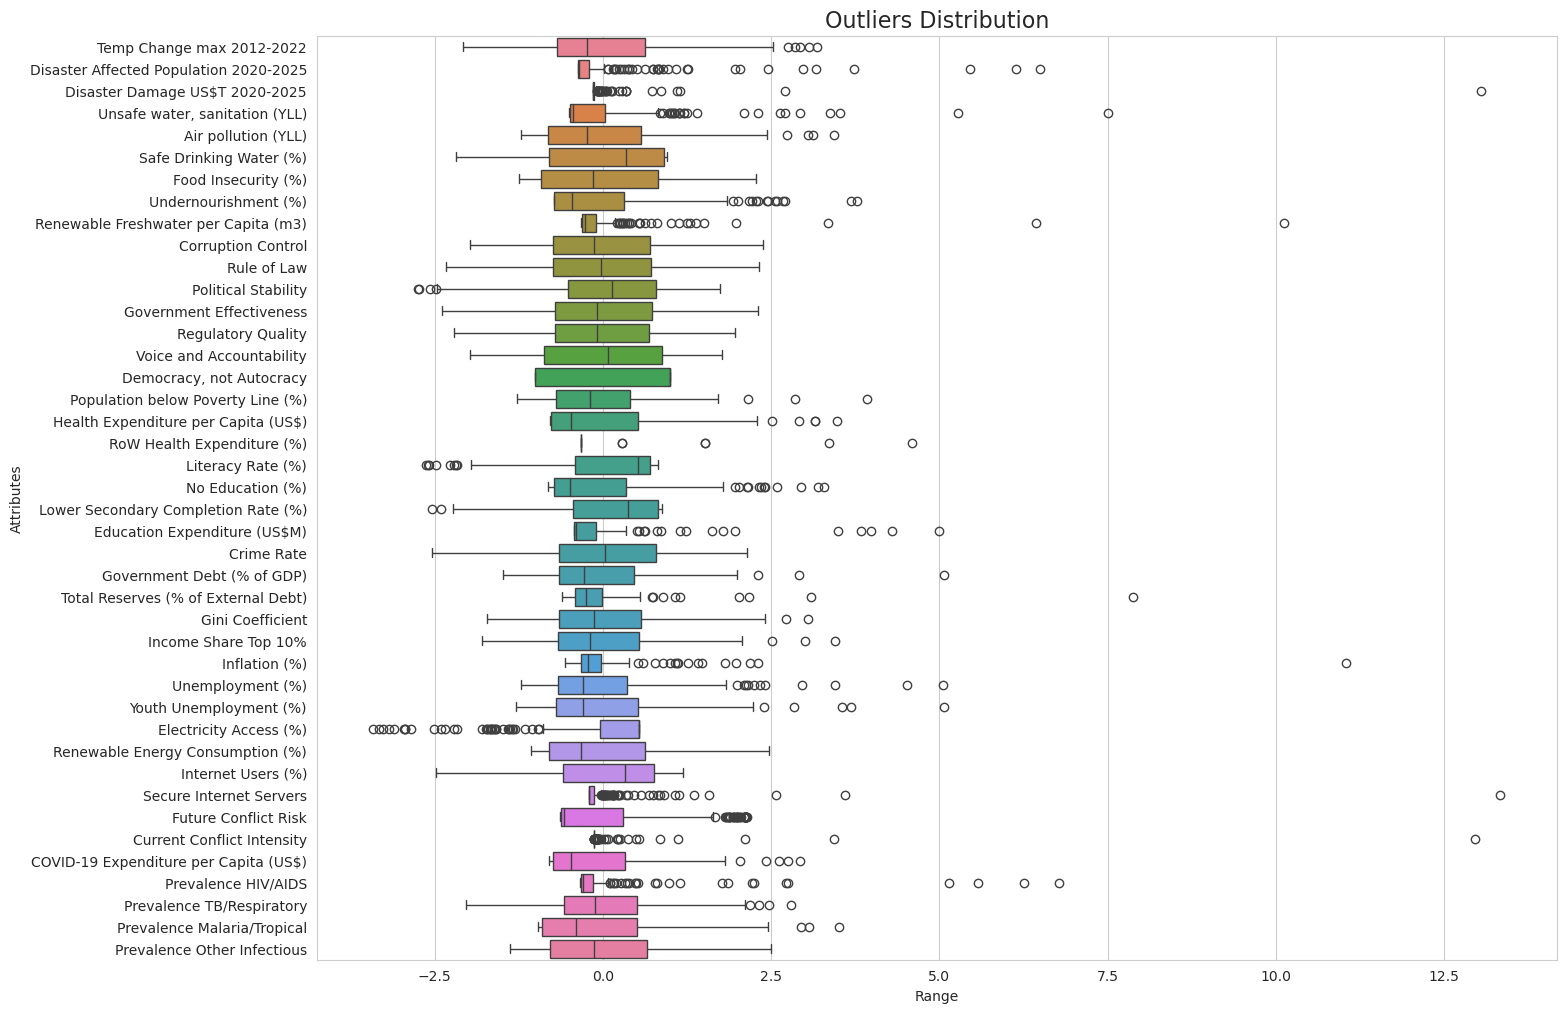

In [41]:
def boxplot(df):
    plt.rcParams['figure.figsize'] = [16,12]
    sns.boxplot(data = df, orient = 'h')
    plt.title("Outliers Distribution", fontsize=16)
    plt.xlabel("Range")
    plt.ylabel("Attributes")

d = df.drop(columns=['Country'])

scaler = StandardScaler()
dfs_std = pd.DataFrame(scaler.fit_transform(d), columns=d.columns)

boxplot(dfs_std)

- The boxplots show that there are quite extreme outliers in the data.
- The scaling of the data is influenced by these outliers.
- StandardScaler is sensitive to outliers, so another scaling method should be used.

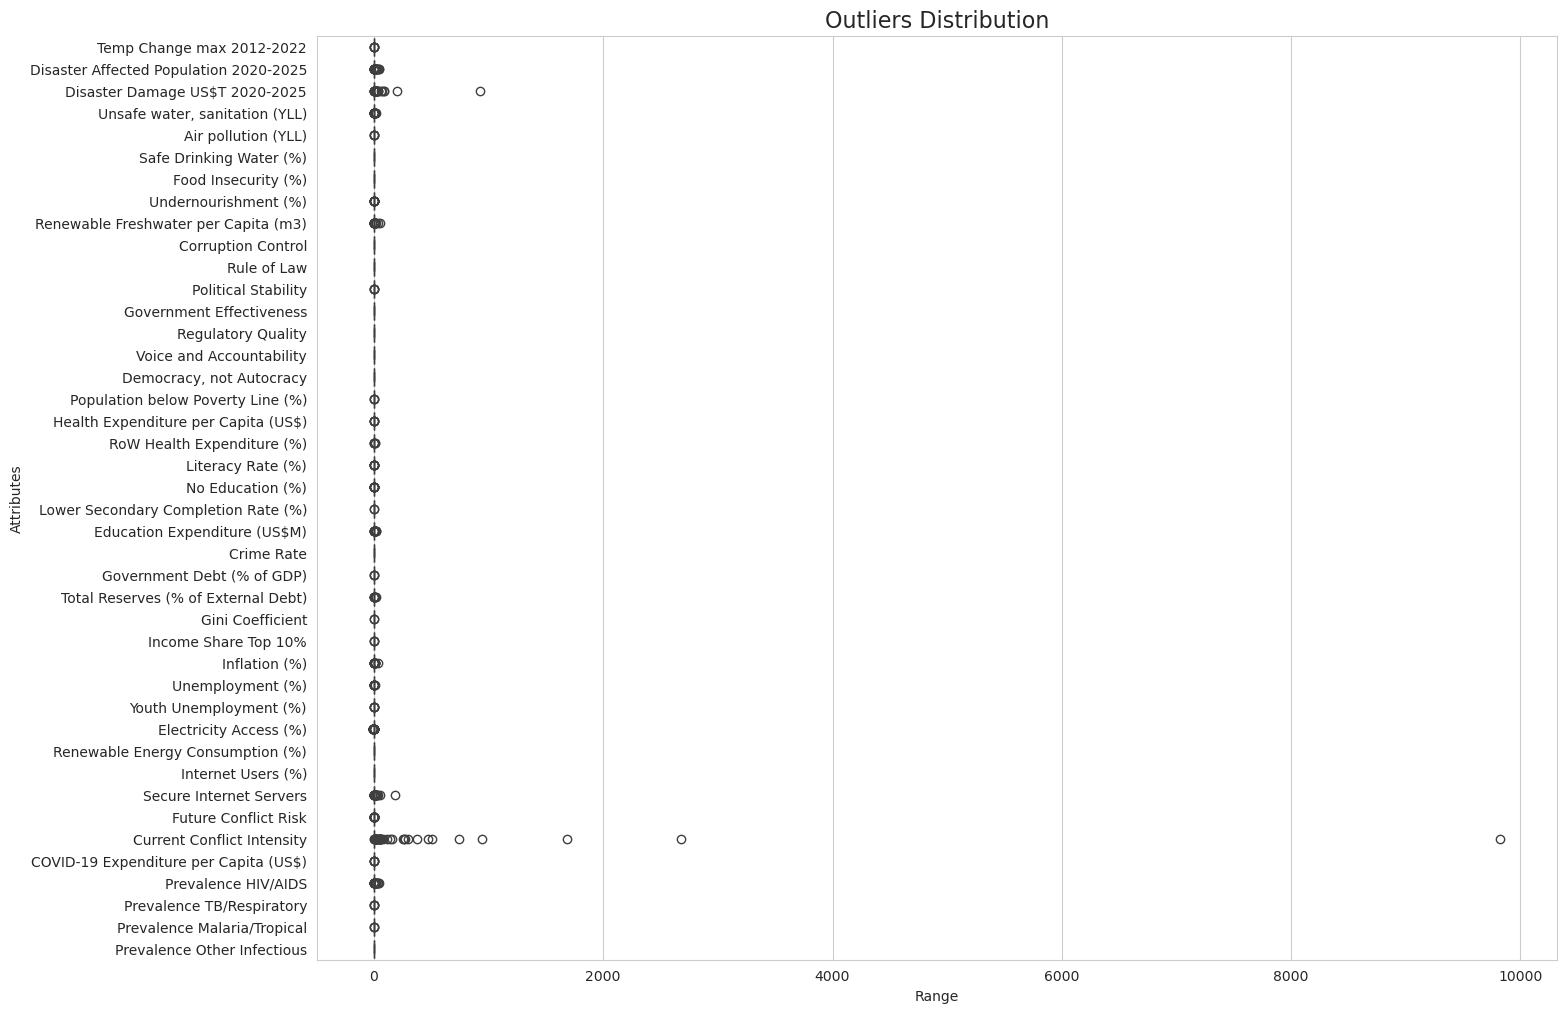

In [42]:
scaler = RobustScaler()
dfs_robust = pd.DataFrame(scaler.fit_transform(d), columns=d.columns)

boxplot(dfs_robust)

- RobustScaler does not let the outliers influence the scaling as much, indicated by the significantly smaller width of the boxplots.

In [43]:
dfsc = pd.concat([df['Country'], dfs_std], axis=1)

# show the first 5 outliers for 'Current Conflict Intensity', which is the indicator with the furthest outliers
find_outliers(dfsc, 'Current Conflict Intensity').sort_values('Current Conflict Intensity', ascending=False).head()[['Country', 'Current Conflict Intensity']]

,Country,Current Conflict Intensity
231,Ukraine,12.957181
184,"Palestine, State of",3.431874
142,Mexico,2.104854
192,Sudan,1.115283
21,Burkina Faso,0.850040


In [44]:
# find outliers for every indicator
find_outliers_per_indicator(dfsc.drop(columns=['Country']))

,Indicator,Outliers,Outlier Percentage
36,Current Conflict Intensity,42.0,16.87
34,Secure Internet Servers,41.0,16.47
31,Electricity Access (%),37.0,14.86
1,Disaster Affected Population 2020-2025,35.0,14.06
2,Disaster Damage US$T 2020-2025,33.0,13.25
35,Future Conflict Risk,32.0,12.85
8,Renewable Freshwater per Capita (m3),28.0,11.24
38,Prevalence HIV/AIDS,26.0,10.44
3,"Unsafe water, sanitation (YLL)",24.0,9.64
22,Education Expenditure (US$M),16.0,6.43


## Save selected data

In [45]:
df_selected.to_csv('data/processing/selected_all_data.csv', index=False)